# Зависимость конверсии воронки от пола посетителей

- [Загрузка данныx кликстрима из файла [`click_stream3.csv`](data/click_stream3.csv "click stream 3")](#Детализация-воронки-до-пола-посетителей-сайта)
- [Данные в таблицах в разрезе нового столбца - Gender](#Данные-в-таблицах-в-разрезе-нового-столбца---Gender)
- [Визуализация воронок с новыми данными о **поле** посетителей](#Визуализация-данных)
- [Bлияние пола посетителя на какую-либо воронку какого-либо месяца на каком-то устройстве](#Предварительные-выводы)
- [Подведение итогов](#Итоги)

## Детализация воронки до пола посетителей сайта

Теперь загрузим данные кликстрима и посчитаем количество переходов в разрезе **пола посетителей сайта**. Попробуем оценить, влияет ли **пол посетителей** на конверсию воронки, и если да, то каким образом.

Произведём расчёт **какого пола**, с каких устройств и в какие месяцы сколько пользователей заходило на каждую из четырёх представленных страниц сайта

In [1]:
import csv
from collections import defaultdict

# создаём словарь пола, где будут храниться словари словарей словарей
funnel_by_gender = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int))))

with open('data/click_stream3.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file, fieldnames=['ID','page','date','device', 'Gender']) # читаем файл
    
    # проходим циклом по объекту csv_reader
    for row in csv_reader: # берем строку из объекта csv_reader

        page = list(row.values())[1] # вытаскиваем название страницы
        event_date = list(row.values())[2][:-3] # вытаскиваем дату в формате YYYY-MM
        device = list(row.values())[3] # устройство
        gender = list(row.values())[4] # пол

        # проверяем условиями и прибавляем единицу к нужному ключу в словаре        
        if page == '1_home_page':
            funnel_by_gender[gender][device][event_date][page] += 1
        elif page == '2_search_page':
            funnel_by_gender[gender][device][event_date][page] += 1
        elif page == '3_payment_page':
            funnel_by_gender[gender][device][event_date][page] += 1
        else:
            funnel_by_gender[gender][device][event_date][page] += 1
               
# отсортируем полученный словарь
for key1, value in funnel_by_gender.items():
    for key2 in value:
        funnel_by_gender[key1][key2] = dict(sorted(funnel_by_gender[key1][key2].items()))

funnel_by_gender

defaultdict(<function __main__.<lambda>()>,
            {'Female': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'Desktop': {'2015-01': defaultdict(int,
                                       {'1_home_page': 7546,
                                        '2_search_page': 3851,
                                        '3_payment_page': 625,
                                        '4_payment_confirmation_page': 33}),
                           '2015-02': defaultdict(int,
                                       {'1_home_page': 7448,
                                        '2_search_page': 3800,
                                        '3_payment_page': 605,
                                        '4_payment_confirmation_page': 26}),
                           '2015-03': defaultdict(int,
                                       {'1_home_page': 7512,
                                        '2_search_page': 3707,
                                        '3_

У нас получился большой словарь, который помимо даты посещения каждой из страниц сайта и устройства, с которого заходили пользователи, также ещё содержит информацию о **поле** каждого пользователя.

## Данные в таблицах в разрезе нового столбца - Gender

Построим из полученного словаря таблицы для каждого устройства в разрезе **пола** посетителей

In [2]:
import pandas as pd
import numpy as np

percent = lambda x: round(x * 100 / x[0], 2) # функция для перевода в проценты

df_female_m = pd.DataFrame(funnel_by_gender['Female']['Mobile'])
columns = pd.MultiIndex.from_product([['Female'], ['Mobile'], df_female_m.columns])
df_female_m.columns = columns
df_female_m.astype(str) + ' (' + df_female_m.apply(percent).astype(str) + '%)'

Female                                \
                                    Mobile                                 
                                   2015-01        2015-02        2015-03   
1_home_page                  3868 (100.0%)  3751 (100.0%)  3738 (100.0%)   
2_search_page                3062 (79.16%)  3020 (80.51%)   747 (19.98%)   
3_payment_page                618 (15.98%)    630 (16.8%)    175 (4.68%)   
4_payment_confirmation_page     76 (1.96%)      60 (1.6%)     20 (0.54%)   

                                            
                                            
                                   2015-04  
1_home_page                  3721 (100.0%)  
2_search_page                 756 (20.32%)  
3_payment_page                 147 (3.95%)  
4_payment_confirmation_page      11 (0.3%)

In [3]:
df_male_m = pd.DataFrame(funnel_by_gender['Male']['Mobile'])
columns = pd.MultiIndex.from_product([['Male'], ['Mobile'], df_male_m.columns])
df_male_m.columns = columns
df_male_m.astype(str) + ' (' + df_male_m.apply(percent).astype(str) + '%)'

Male                                \
                                    Mobile                                 
                                   2015-01        2015-02        2015-03   
1_home_page                  3682 (100.0%)  3799 (100.0%)  3812 (100.0%)   
2_search_page                2963 (80.47%)  3035 (79.89%)   762 (19.99%)   
3_payment_page                551 (14.96%)   591 (15.56%)     160 (4.2%)   
4_payment_confirmation_page     53 (1.44%)     59 (1.55%)     10 (0.26%)   

                                            
                                            
                                   2015-04  
1_home_page                  3829 (100.0%)  
2_search_page                 755 (19.72%)  
3_payment_page                 148 (3.87%)  
4_payment_confirmation_page     13 (0.34%)

In [4]:
df_female_d = pd.DataFrame(funnel_by_gender['Female']['Desktop'])
columns = pd.MultiIndex.from_product([['Female'], ['Desktop'], df_female_d.columns])
df_female_d.columns = columns
df_female_d.astype(str) + ' (' + df_female_d.apply(percent).astype(str) + '%)'

Female                                \
                                   Desktop                                 
                                   2015-01        2015-02        2015-03   
1_home_page                  7546 (100.0%)  7448 (100.0%)  7512 (100.0%)   
2_search_page                3851 (51.03%)  3800 (51.02%)  3707 (49.35%)   
3_payment_page                 625 (8.28%)    605 (8.12%)    162 (2.16%)   
4_payment_confirmation_page     33 (0.44%)     26 (0.35%)      6 (0.08%)   

                                            
                                            
                                   2015-04  
1_home_page                  7491 (100.0%)  
2_search_page                3733 (49.83%)  
3_payment_page                 138 (1.84%)  
4_payment_confirmation_page      9 (0.12%)

In [5]:
df_male_d = pd.DataFrame(funnel_by_gender['Male']['Desktop'])
columns = pd.MultiIndex.from_product([['Male'], ['Desktop'], df_male_d.columns])
df_male_d.columns = columns
df_male_d.astype(str) + ' (' + df_male_d.apply(percent).astype(str) + '%)'

Male                                \
                                   Desktop                                 
                                   2015-01        2015-02        2015-03   
1_home_page                  7504 (100.0%)  7602 (100.0%)  7538 (100.0%)   
2_search_page                3678 (49.01%)  3832 (50.41%)  3663 (48.59%)   
3_payment_page                 596 (7.94%)    586 (7.71%)    134 (1.78%)   
4_payment_confirmation_page     27 (0.36%)     28 (0.37%)      8 (0.11%)   

                                            
                                            
                                   2015-04  
1_home_page                  7559 (100.0%)  
2_search_page                3836 (50.75%)  
3_payment_page                 164 (2.17%)  
4_payment_confirmation_page     13 (0.17%)

## Визуализация данных

А теперь для наглядности представим полученные данные на графиках.<br>
Но сначала соберём все представленные данные в одну таблицу.

In [6]:
df_all = pd.concat([df_female_d, df_male_d, df_female_m, df_male_m], axis=1) # собираем все дф в один общий
df_all = df_all.stack([2,0]).unstack([0,2]) # развернём таблицу так, чтобы в индексах были даты, и переорганизуем колонки
df_all

Desktop                                                \
        1_home_page       2_search_page       3_payment_page        
             Female  Male        Female  Male         Female Male   
2015-01        7546  7504          3851  3678            625  596   
2015-02        7448  7602          3800  3832            605  586   
2015-03        7512  7538          3707  3663            162  134   
2015-04        7491  7559          3733  3836            138  164   

                                              Mobile                      \
        4_payment_confirmation_page      1_home_page       2_search_page   
                             Female Male      Female  Male        Female   
2015-01                          33   27        3868  3682          3062   
2015-02                          26   28        3751  3799          3020   
2015-03                           6    8        3738  3812           747   
2015-04                           9   13        3721  3829           756   

                                                                    
              3_payment_page      4_payment_confirmation_page       
         Male         Female Male                      Female Male  
2015-01  2963            618  551                          76   53  
2015-02  3035            630  591                          60   59  
2015-03   762            175  160                          20   10  
2015-04   755            147  148                          11   13

In [7]:
pages = ['1_home_page',   # зададим список страниц сайта
         '2_search_page',
         '3_payment_page',
         '4_payment_confirmation_page']

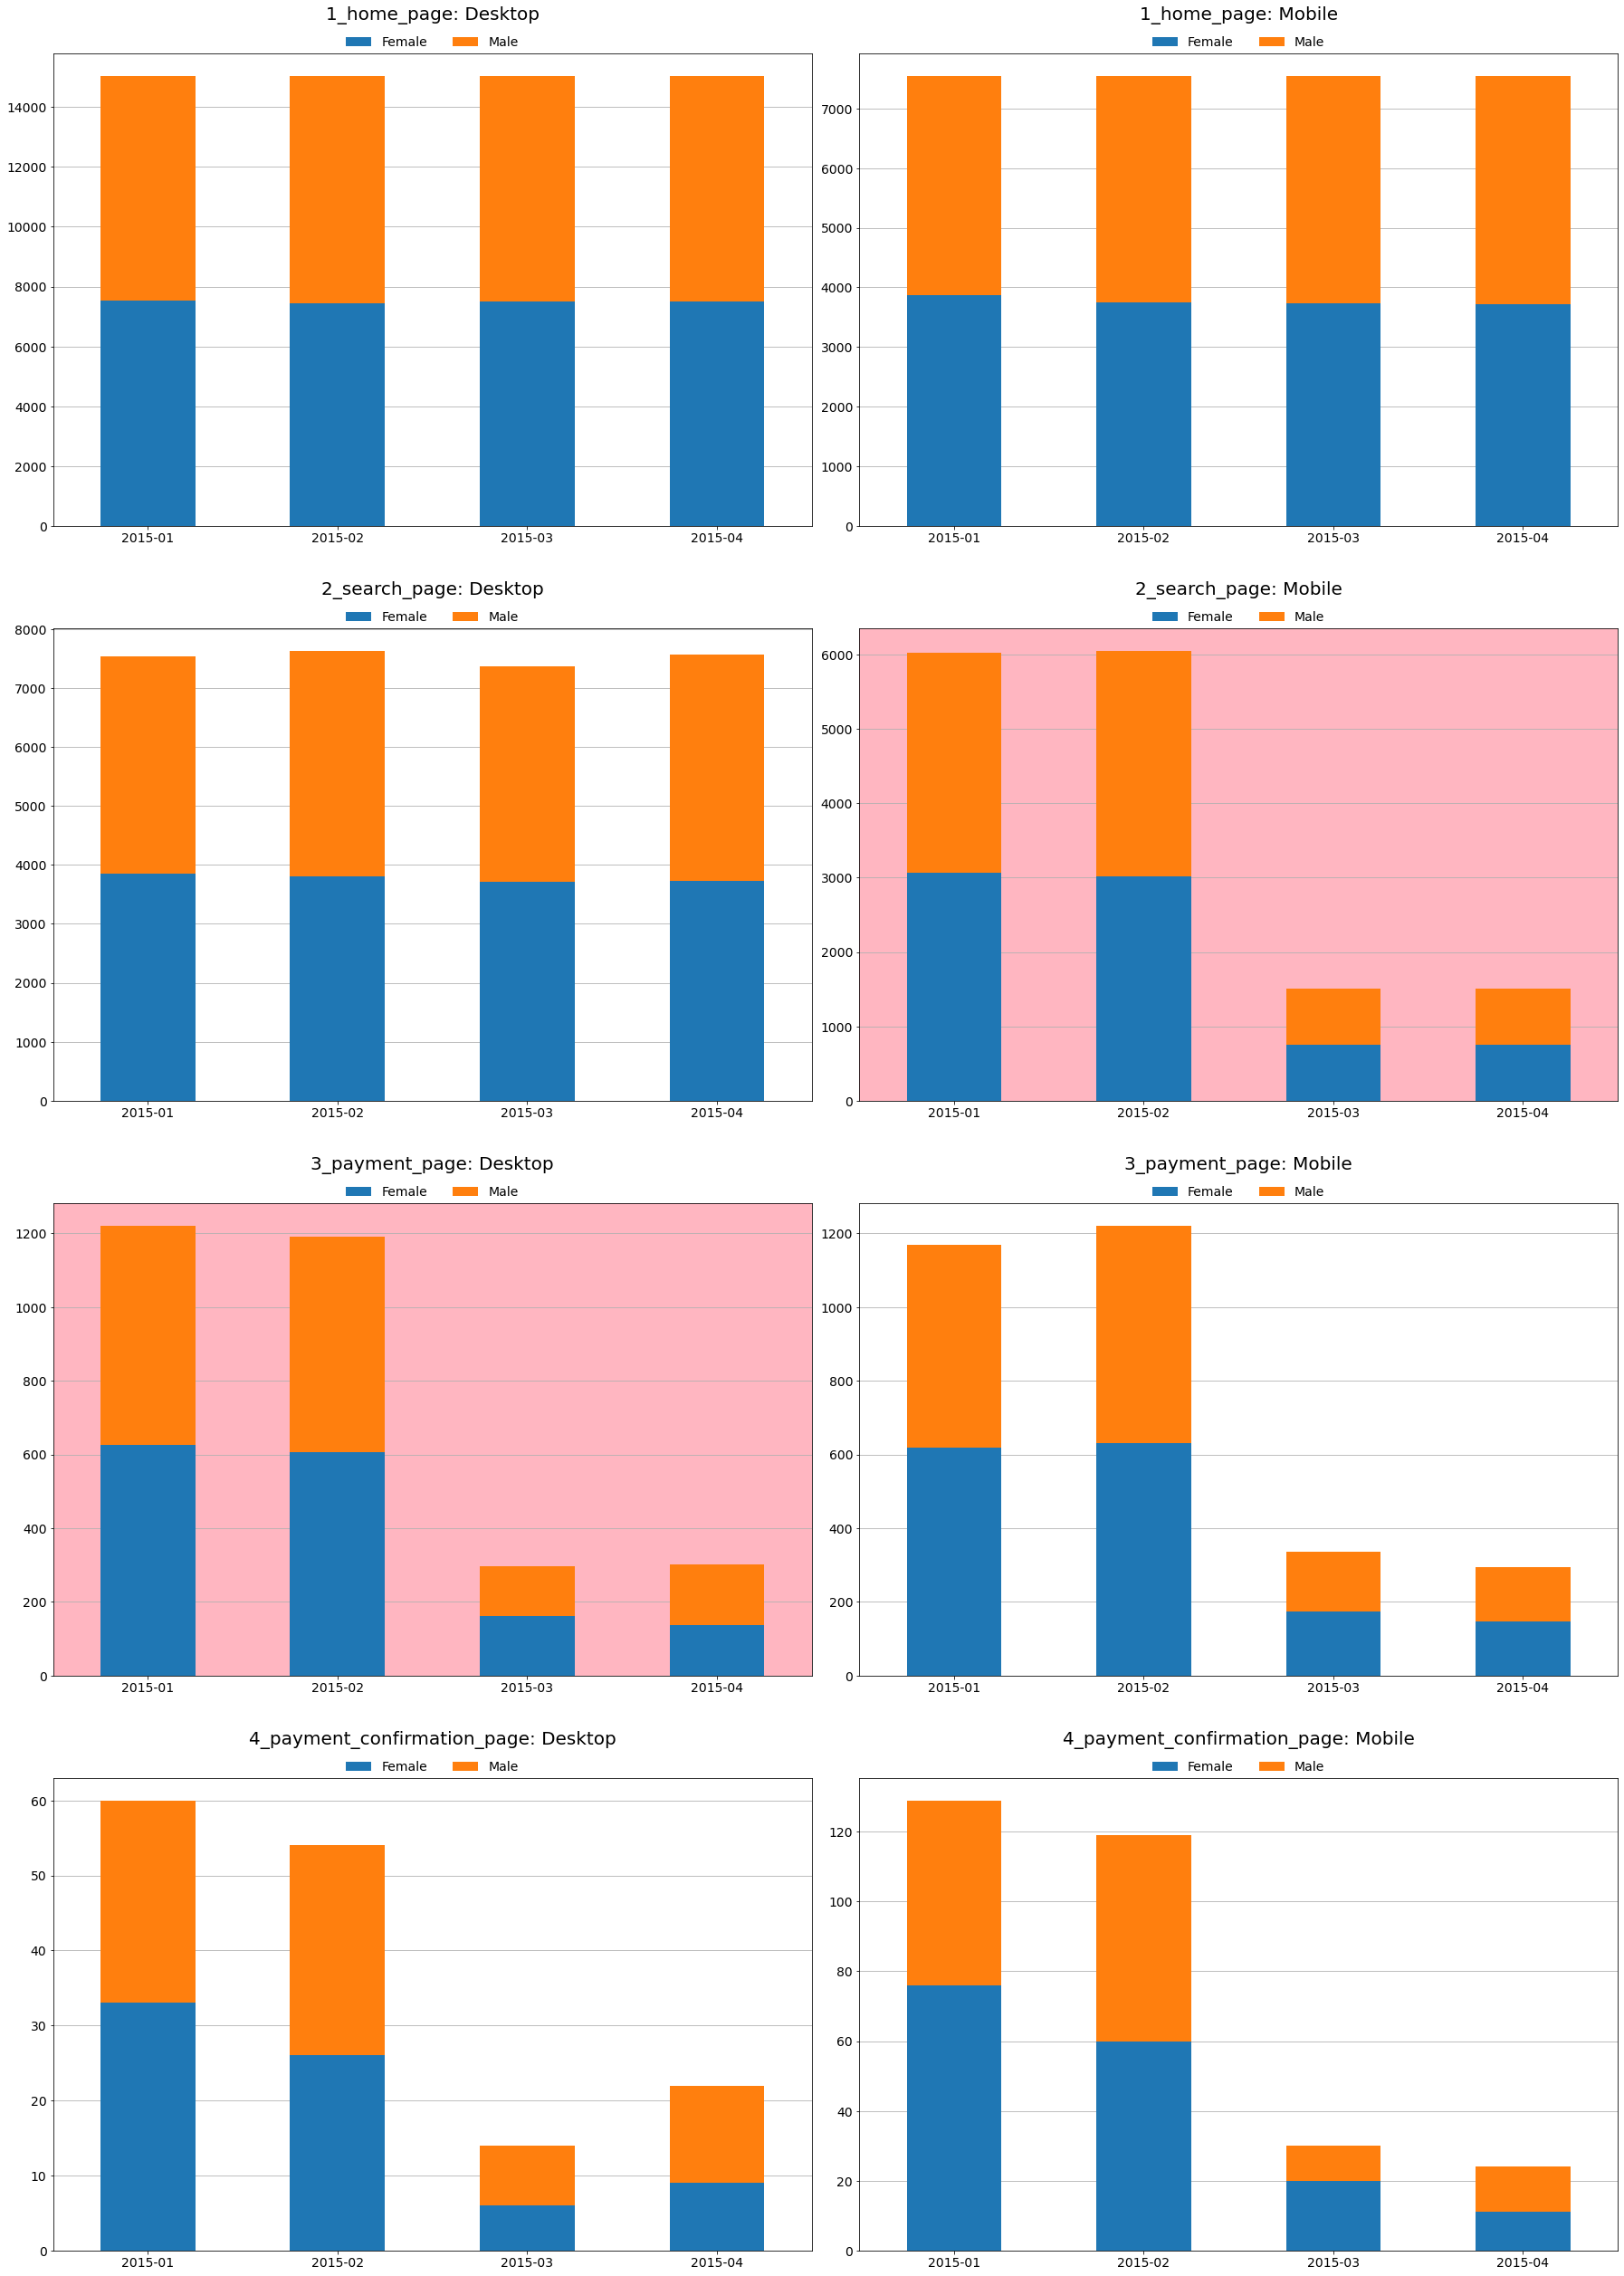

In [8]:
from matplotlib import pyplot as plt

f,ax = plt.subplots(4, 2, figsize=(25,35))
for i, page in enumerate(pages):
    bar1 = df_all['Desktop'][page].plot(kind='bar', stacked=True, ax=ax[i,0], rot=0)
    bar1.set_title(page+': Desktop', loc='center', pad=37, fontsize=20)
    bar1.tick_params(labelsize=14)
    bar1.legend(loc=9, bbox_to_anchor=(0, 0.96, 1, 0.1), ncol=2, frameon=False, fontsize=14)
    bar1.grid(clip_on=True, axis='y')
    bar1.set_axisbelow(True)
    if i == 2:
        bar1.set_facecolor('lightpink')
    bar2 = df_all['Mobile'][page].plot(kind='bar', stacked=True, ax=ax[i,1], rot=0)
    bar2.set_title(page+': Mobile', loc='center', pad=37, fontsize=20)
    bar2.tick_params(labelsize=14)
    bar2.legend(loc=9, bbox_to_anchor=(0, 0.96, 1, 0.1), ncol=2, frameon=False, fontsize=14)
    bar2.grid(clip_on=True, axis='y')
    bar2.set_axisbelow(True)
    if i == 1:
        bar2.set_facecolor('lightpink')
plt.tight_layout(h_pad=4, pad=1)
plt.show()

Для ещё большей наглядности представим теперь все ***типы устройств*** вместе на каждом из графиков, разбив графики по страницам посещения сайта 

In [9]:
df_all_ord = df_all.stack([2,0]).unstack(2).unstack(1) # снова переорганизуем таблицу, теперь по страничкам
df_all_ord

1_home_page                    2_search_page                     \
            Desktop       Mobile             Desktop       Mobile         
             Female  Male Female  Male        Female  Male Female  Male   
2015-01        7546  7504   3868  3682          3851  3678   3062  2963   
2015-02        7448  7602   3751  3799          3800  3832   3020  3035   
2015-03        7512  7538   3738  3812          3707  3663    747   762   
2015-04        7491  7559   3721  3829          3733  3836    756   755   

        3_payment_page                  4_payment_confirmation_page       \
               Desktop      Mobile                          Desktop        
                Female Male Female Male                      Female Male   
2015-01            625  596    618  551                          33   27   
2015-02            605  586    630  591                          26   28   
2015-03            162  134    175  160                           6    8   
2015-04            138  164    147  148                           9   13   

                     
        Mobile       
        Female Male  
2015-01     76   53  
2015-02     60   59  
2015-03     20   10  
2015-04     11   13

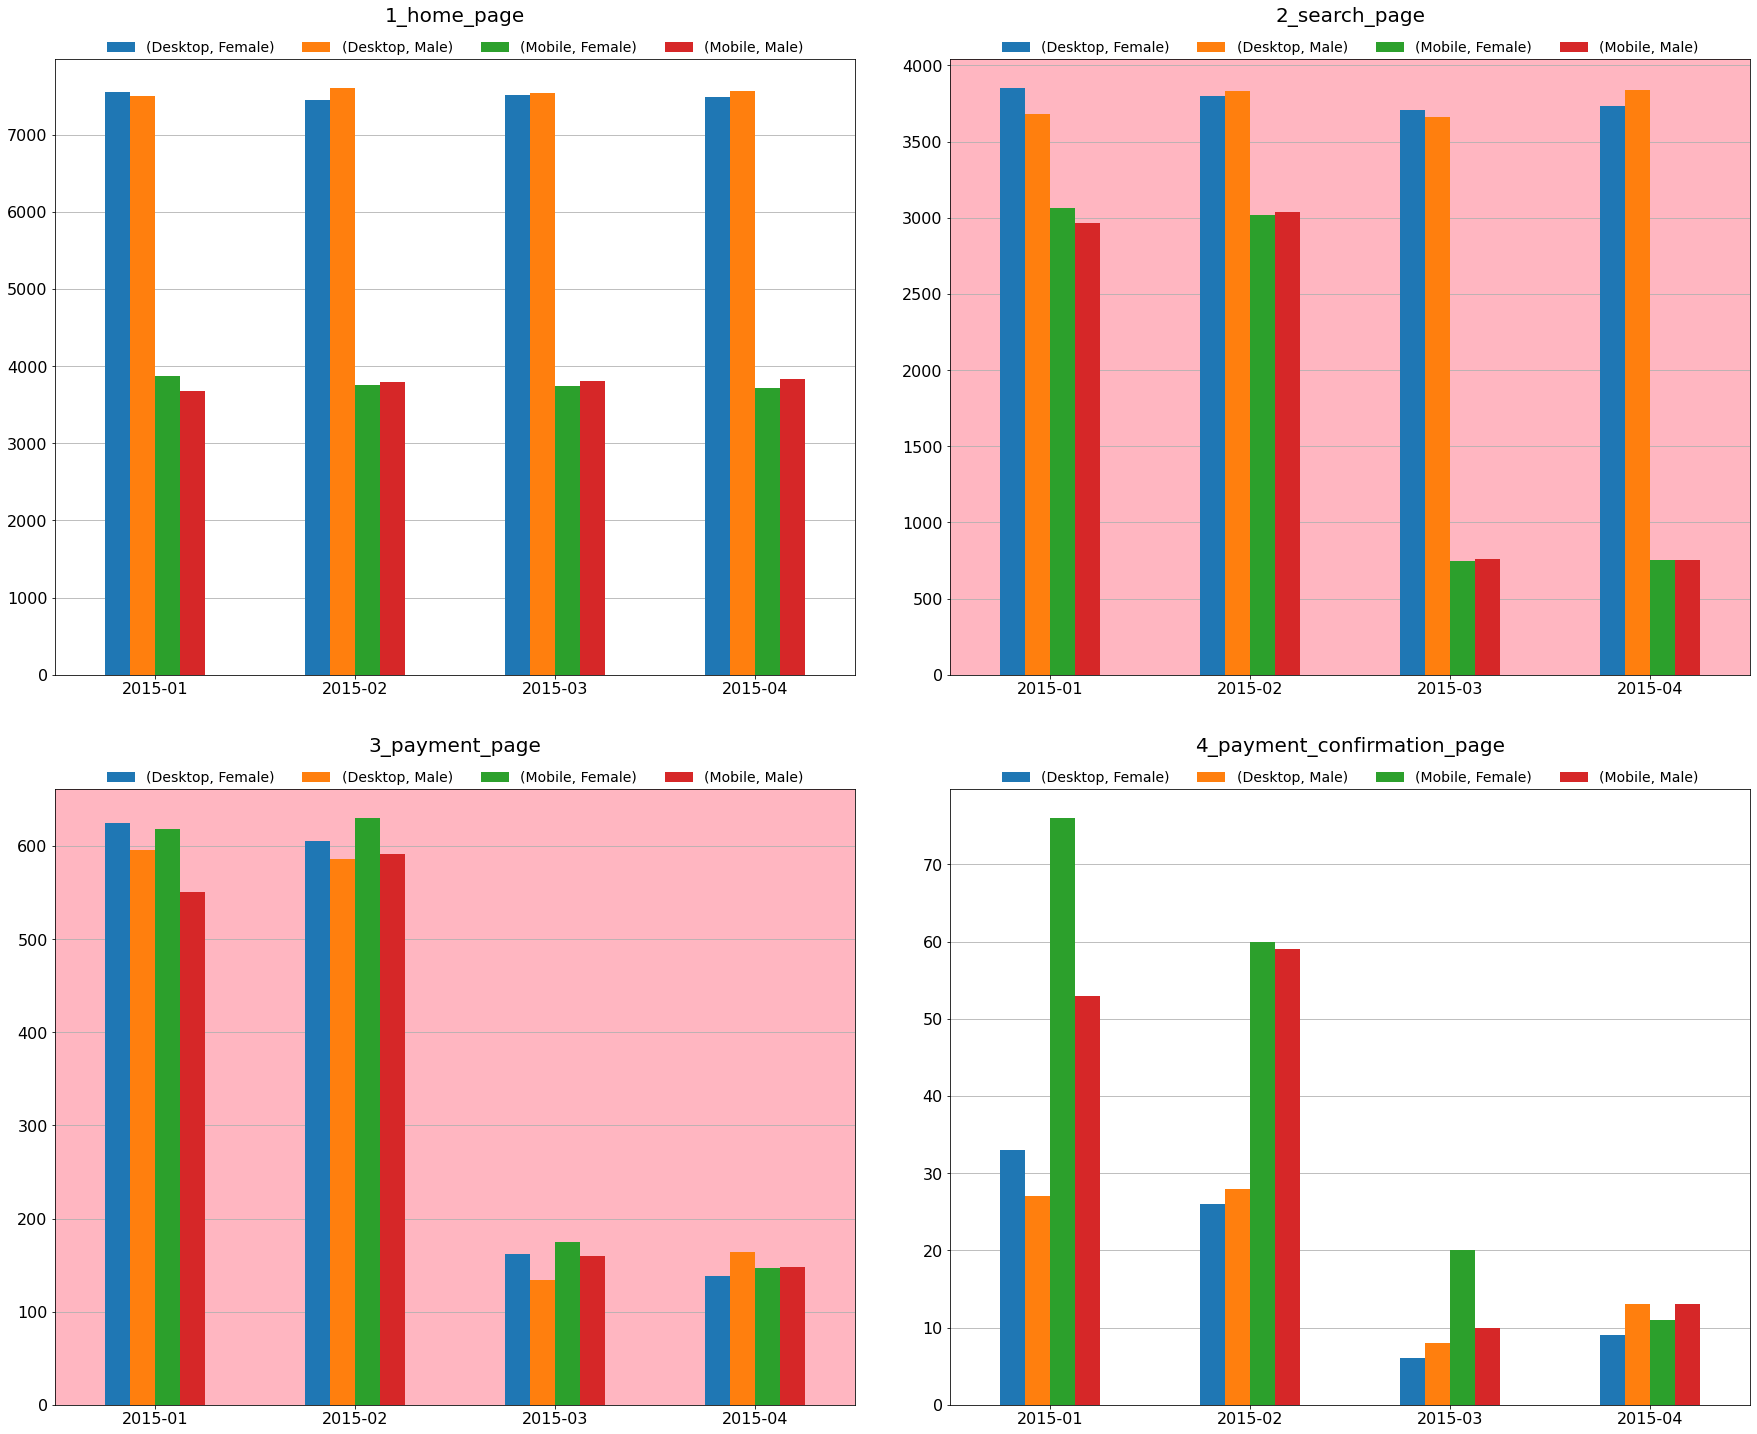

In [10]:
fig = plt.figure(figsize=(25,20))
for i in range(4):
    subplot = fig.add_subplot(2,2,i+1)
    df_all_ord.loc[:,pages[i]].plot.bar(ax=subplot, rot=0)
    subplot.set_title(pages[i], loc='center', pad=37, fontsize=20)
    subplot.set_xlabel(None)
    subplot.tick_params(labelsize=16)
    subplot.grid(axis='y')
    subplot.set_axisbelow(True)
    subplot.legend(loc=9, bbox_to_anchor=(0, 0.95, 1, 0.1), ncol=4, frameon=False, fontsize=14)
    if i in (1, 2):
        subplot.set_facecolor('lightpink')
plt.tight_layout(h_pad=4, pad=1)
plt.show()

А теперь отобразим полученные данные ещё и в таком совмещённом виде, где наиболее чётко видно ухудшение *воронки* по месяцам на каждой из страничек.<br>
Отметим красным цветом те странички сайта, где наблюдается резкое **ухудшение** *воронки*

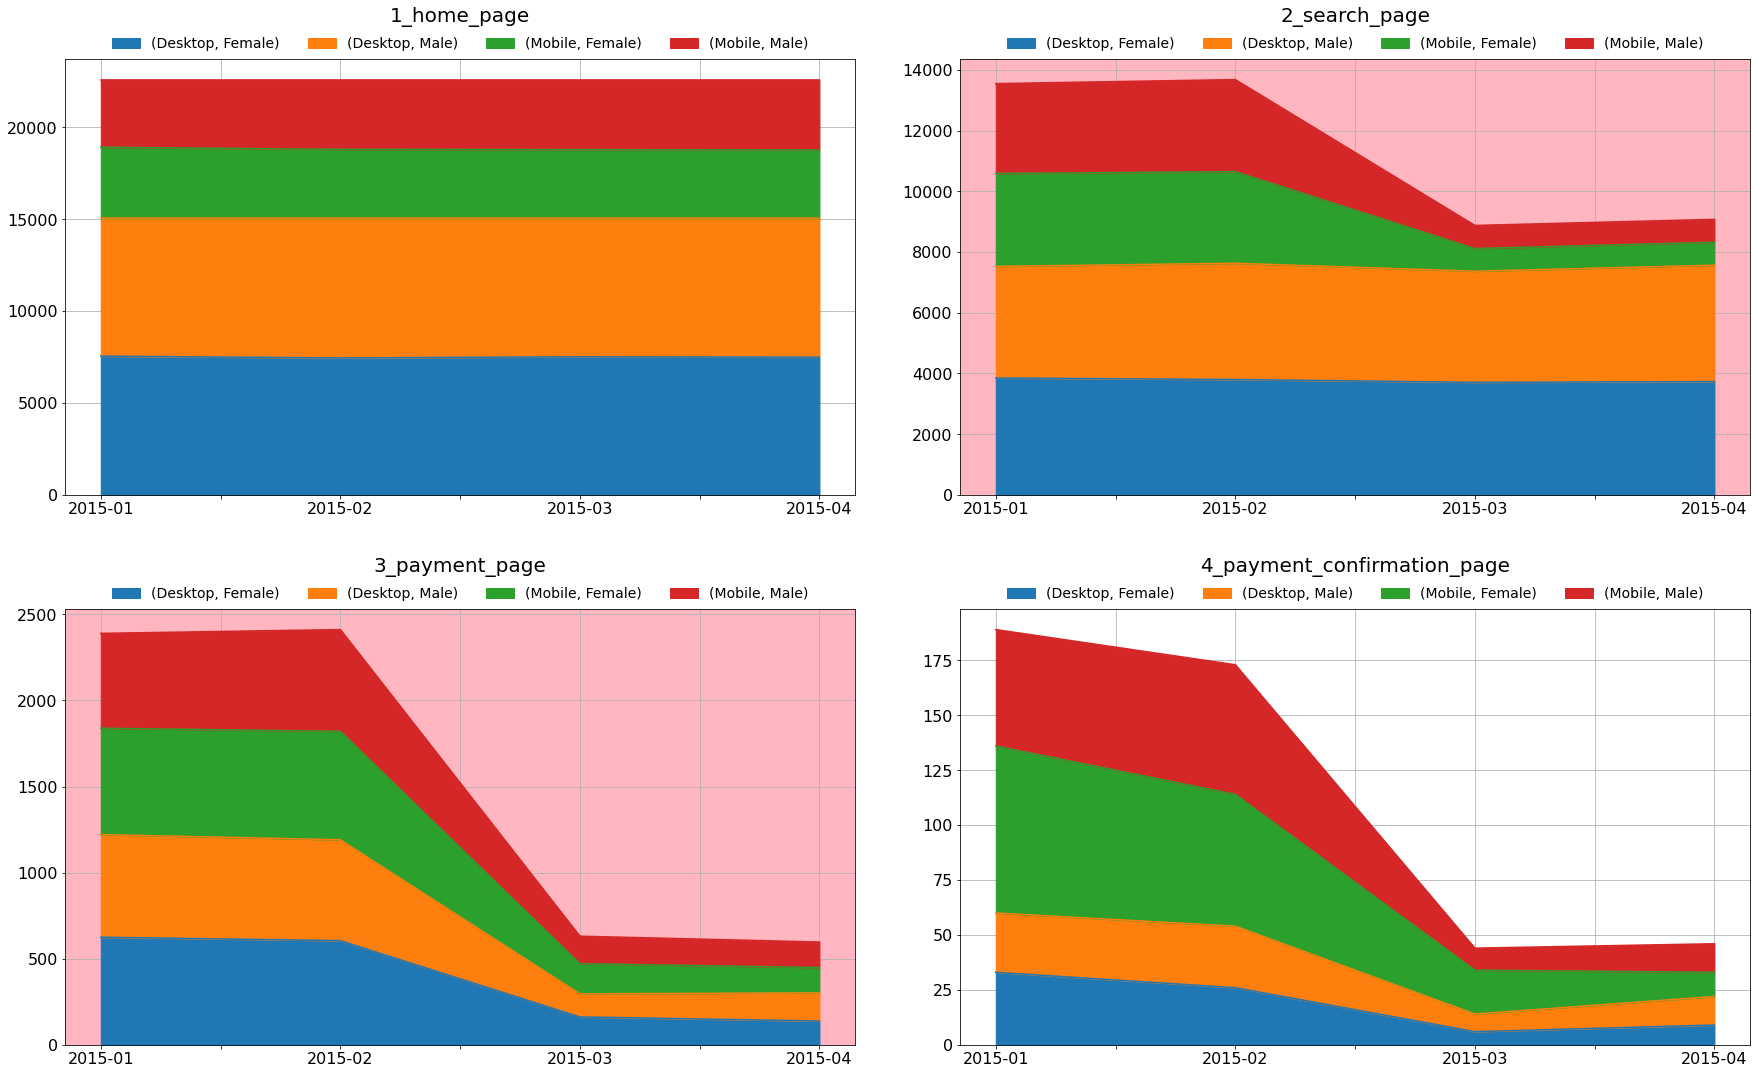

In [11]:
fig = plt.figure(figsize=(25,15))
for i in range(4):
    subplot = fig.add_subplot(2,2,i+1)
    df_all_ord.loc[:,pages[i]].plot.area(ax=subplot, rot=0, title=pages[i])
    subplot.set_title(pages[i], loc='center', pad=37, fontsize=20)
    subplot.set_xlabel(None)
    subplot.tick_params(labelsize=16)
    subplot.grid()
    subplot.set_axisbelow(True)
    subplot.legend(loc=9, bbox_to_anchor=(0, 0.98, 1, 0.1), ncol=4, frameon=False, fontsize=14)
    if i in (1, 2):
        subplot.set_facecolor('lightpink')
plt.tight_layout(h_pad=4, pad=1)
plt.show()

## Предварительные выводы

Итак, настало время проанализировать построенные графики и сделать предварительные выводы.

На ***мобильных устройствах*** помимо `страницы поиска`, видно также <u>**резкое падение аж в два раза (!)**</u> на `странице подверждения` y **мужчин** в марте .  И на 30% в январе.<br>
Также видно, что с января по март <u>**мужчины** переходили ***меньше*** **женщин**</u> к `странице оплаты` на **~10%**, но к апрелю показатели сравнялись.

Следует также отметить, что несмотря на то, что сначала гораздо больше посетителей наблюдается с ***десктопных устройств*** (у обоих полов пользователей), но уже на `странице оплаты` показатели сравниваются (однако при этом, падение показателей для **мужчин** ***больше***, чем для **женщин**, если брать во внимание пол посетителей).<br>
С января по март идёт падение. В марте разрыв между женщинами и мужчинами, перешедшими на `страницу оплаты`, составил *20%*. Однако, в апреле мужчины на *20%* больше переходили на `страницу оплаты заказа`.<br>
А на `странице подтверждения заказа` наблюдатеся обратная ситуация: количество пользователей ***десктопных устройств*** становится <u>*в два раза меньше*</u>  чем количество пользователей ***мобильных устройств***. Особенно эта разница заметна у **женщин** (***мужчины переходили чаще женщин***, несмотря на более низкие показатели на `странице оплаты` с февраля по апрель).<br>
В матре конверсия перехода составила *6%* для мужчин против *3.7%* для женщин.<br>
В апреле конверсия перехода от `страницы оплаты` к `странице подтверждения` составила для мужчин *8%*, а для женщин *6.5%*. Причём, на ***десктопных устройствах*** в апреле наблюдатеся **рост посетителей** `страницы подтверждения`  - у **обоих полов** пользователей - в 1.5 раза по отношению к марту. В то время как на **мобильных устройствах** к апрелю незначительный рост наблюдается только у **мужчин**, а вот у **женщин** виден спад активности - <u>**почти в два раза** (!)</u>. И если в марте количество **женщин** передших на `страницу подтверждения платежа` было в **2 раза больше** чем количество **мужчин**, то уже в апреле, <u>в результате этого падения</u>, количество <u>**мужчин** уже превышает **женщин**</u>.
___

## Итоги

Мы выяснили, что на `странице поиска` для **мобильных устройств** в марте-апреле падение было ***и у мужчин и у женщин***. На `странице оплаты` в январе и феврале небольшое ухудшение показателей у ***мужчин***.<br>
А вот на `странице подтверждения` для ***мужчин*** падение составило *30%* в январе, а в марте - на *50%*! К апрелю показатели выровнялись.<br>
На **десктопах** на `странице оплаты` в матре было падение на *20%* у ***мужчин*** по сравнению с ***женщинами***, а вот в апреле - наоборот - у ***женщин*** показатели упали на *20%* по отношению к ***мужчинам***.<br>
На `странице подтверждения оплаты` наблюдается <u>сильное падение конверсии</u> для ***женщин*** в матре - всего *3.7%* против *6%* для ***мужчин***. В апреле <u>показатель конверсии</u> для ***женщин*** подрос до *6.5%*, а у мужчин - до *8%*.<br>
По итогам, <u>обнаружены отконения показателей *воронки* в зависимости от **пола** посетителей страниц сайта</u>. Но насколько значимы эти отклонения, ответить можно лишь после того, как будут сделаны A/B тесты.
___

## Заключение

- Воронка позволяет извлечь из данных о посещении сайта практические
выводы
- В данных прежде всего полезно оценить динамику (мы смотрели по
месяцам)
- Поняв динамику, полезно начать углубляться в данные, добавляя больше
и больше факторов для анализа\
(Мы проанализировали сначала в разрезе устройств, с которых заходили пользователи на сайт,
а затем и в разрезе пола посетителей сайта.)